In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5)

In [202]:
labelencoder = LabelEncoder()

In [203]:
import seaborn as sns
from sklearn.metrics import accuracy_score

In [204]:
train = pd.read_csv('/Users/bagusariyono/Downloads/titanic/train.csv')
test = pd.read_csv('/Users/bagusariyono/Downloads/titanic/test.csv')

In [205]:
#train.head()

In [206]:
#Check the datatypes
# train.dtypes

In [207]:
#Describe the data
# train.describe()

In [208]:
# train

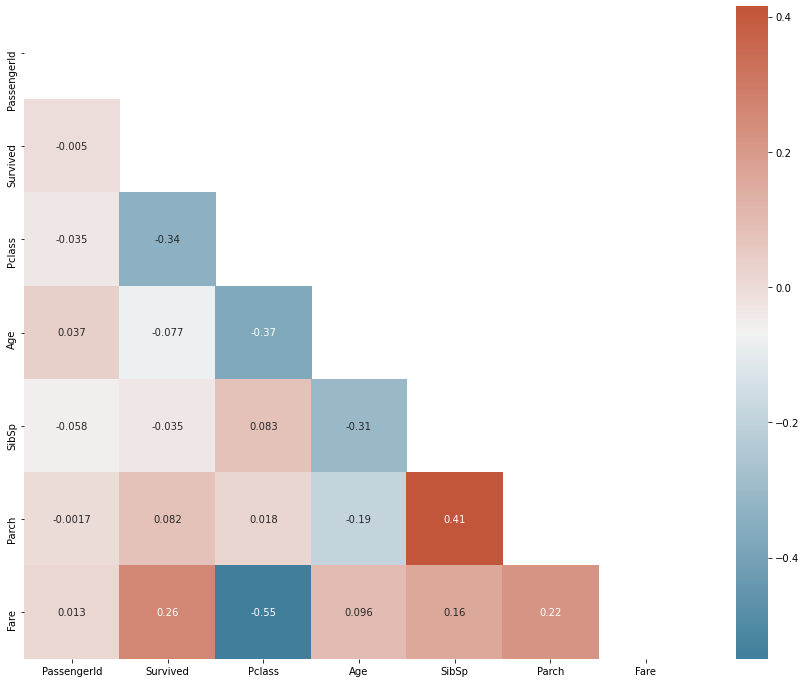

In [209]:
#Plot correlation
fig, ax = plt.subplots(figsize=(15,12))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True,mask=mask);

In [210]:
corr = train.corr()

In [211]:
corr.to_excel('correlation.xls')

#Plotti
## The variable correlated with survive is pclass
High correlation between pclass and fare

In [212]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [213]:
train.corr()[['Survived','Sex','Age','Fare','Pclass_1']]

KeyError: "['Sex', 'Pclass_1'] not in index"

In [214]:
# From the movie I saw that priority for boat save is prioritized for child and woman

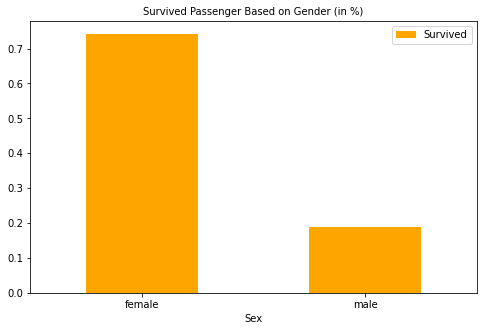

In [215]:
#See based on sex
#Idea is they save the woman first
sex = (train['Survived'].groupby(train['Sex']).mean()).to_frame()#
ax = sex.plot.bar(figsize=(8,5),rot=0, color='orange')
ax.set_title("Survived Passenger Based on Gender (in %)", fontsize =10);

/Users/bagusariyono/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


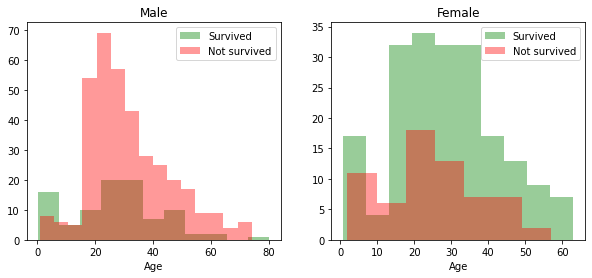

In [216]:
survived = 'Survived'
not_survived = 'Not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = train[train.Sex=='female']
male = train[train.Sex=='male']
ax = sns.distplot(male[male.Survived==1].Age.dropna(),ax = axes[0],label = survived, kde = False,color='g')
ax = sns.distplot(male[male.Survived==0].Age.dropna(),ax = axes[0],label = not_survived, kde = False,color='r')
ax.set_title('Male')
ax.legend()
ax = sns.distplot(female[female.Survived==1].Age.dropna(),ax = axes[1],label = survived, kde = False,color='g')
ax = sns.distplot(female[female.Survived==0].Age.dropna(),ax = axes[1],label = not_survived, kde = False,color='r')
ax.set_title('Female')
ax.legend();

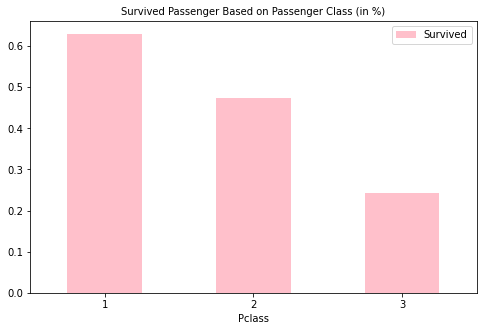

In [217]:
status = (train['Survived'].groupby(train['Pclass']).mean()).to_frame()
ax = status.plot.bar(figsize=(8,5),rot=0, color='pink')
ax.set_title("Survived Passenger Based on Passenger Class (in %)", fontsize =10);

Survival chances decrease monotonically from high class to low class

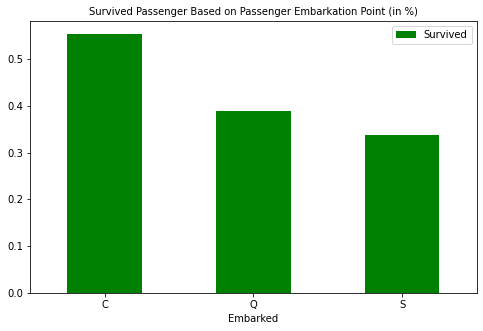

In [218]:
embarkation = (train['Survived'].groupby(train['Embarked']).mean()).to_frame()
ax = embarkation.plot.bar(figsize=(8,5),rot=0,color='green')
ax.set_title("Survived Passenger Based on Passenger Embarkation Point (in %)", fontsize =10);

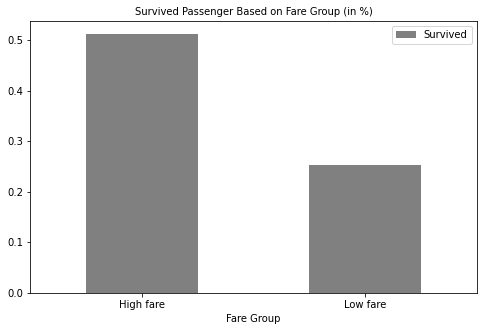

In [219]:
train['Fare Group']= 'Low fare'
#Considered as high if fare higher than median
train.loc[train.Fare >= train.Fare.median(), 'Fare Group'] = 'High fare'
faregroup = (train['Survived'].groupby(train['Fare Group']).mean()).to_frame()
ax = faregroup.plot.bar(figsize=(8,5),rot=0,color='grey')
ax.set_title("Survived Passenger Based on Fare Group (in %)", fontsize =10);

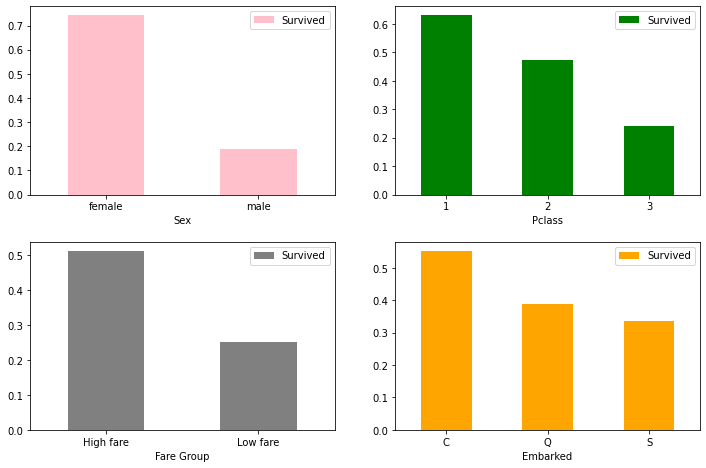

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize =(12,6))
status.plot(ax=axes[0,1], kind='bar',rot=0,color='green')
sex.plot(ax=axes[0,0], kind='bar',rot=0, color='pink')
embarkation.plot(ax=axes[1,1], kind='bar',rot=0, color='orange')
faregroup.plot(ax=axes[1,0], kind='bar',rot=0, color='grey')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.25, wspace=0.2)
plt.savefig('classification.png', bbox_inches='tight')
#plt.savefig('classification.png',figsize=(20, 10))
#axes.title.set_text('Percentage of Survived Passenger Based on Sex, Passenger Class, and Embarkation Point');

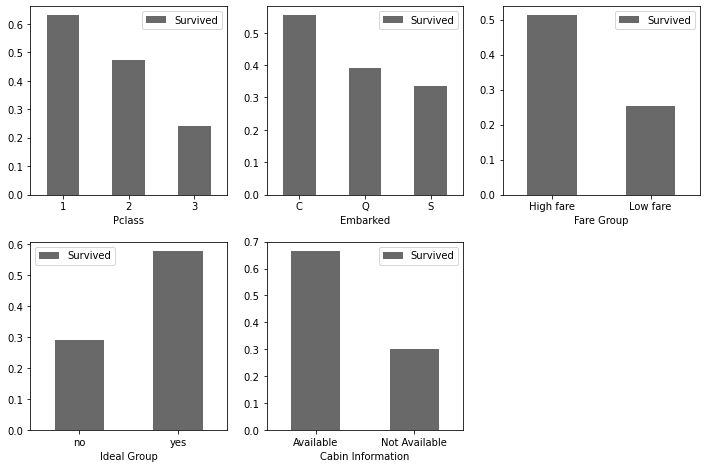

In [221]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize =(12,6))
status.plot(ax=axes[0,0], kind='bar',rot=0,color='dimgray')
#sex.plot(ax=axes[0,0], kind='bar',rot=0, color='pink')
embarkation.plot(ax=axes[0,1], kind='bar',rot=0, color='dimgray')
faregroup.plot(ax=axes[0,2], kind='bar',rot=0, color='dimgray')
idealtravmem.plot(ax=axes[1,0], kind='bar',rot=0, color='dimgray')
wcabin.plot(ax=axes[1,1], kind='bar',rot=0, color='dimgray')
axes[-1, -1].axis('off')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.25, wspace=0.2)
plt.savefig('classification.png', bbox_inches='tight')
#plt.savefig('classification.png',figsize=(20, 10))
#axes.title.set_text('Percentage of Survived Passenger Based on Sex, Passenger Class, and Embarkation Point');

In [222]:
idealtravmem.plot.bar(ax=axes[1],rot=0,color='khaki');

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [223]:
#Give old if higher than mean
train['old']= 0
train.loc[train.Age >= train.Age.median(), 'old'] = 1

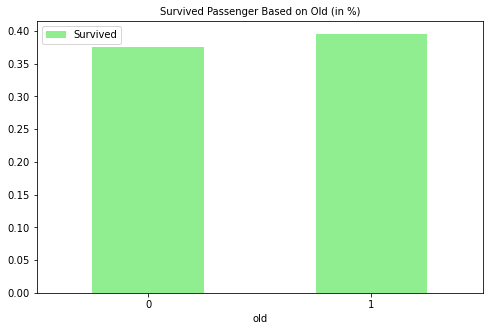

In [224]:
old = (train['Survived'].groupby(train['old']).mean()).to_frame()
ax = old.plot.bar(figsize=(8,5),rot=0,color='lightgreen')
ax.set_title("Survived Passenger Based on Old (in %)", fontsize =10);

In [225]:
#Create child variable
train['child']= 0
train.loc[train.Age <= 10, 'child'] = 1

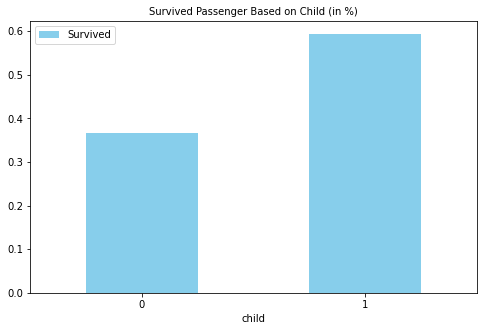

In [226]:
child = (train['Survived'].groupby(train['child']).mean()).to_frame()
ax = child.plot.bar(figsize=(8,5),rot=0,color='skyblue')
ax.set_title("Survived Passenger Based on Child (in %)", fontsize =10);

In [227]:
#Cabin
train['Cabin Information']= 'Not Available'
train.loc[train.Cabin.notnull(), 'Cabin Information'] = 'Available'

In [228]:
wcabin

,Survived
Cabin Information,
Available,0.666667
Not Available,0.299854


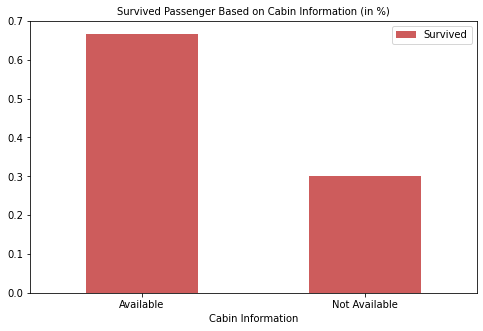

In [229]:
wcabin = (train['Survived'].groupby(train['Cabin Information']).mean()).to_frame()
ax = wcabin.plot.bar(figsize=(8,5),rot=0,color='indianred')
ax.set_title("Survived Passenger Based on Cabin Information (in %)", fontsize =10);

In [230]:
#Strip the cabin information
train['Cabin Code'] = train['Cabin'].astype(str).str[0]

In [231]:
cabcode = train.groupby(['Cabin Code','Pclass']).count()
cabcode

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Cabin Code Pclass                                                        
A          1                15        15    15   15   12     15     15   
B          1                47        47    47   47   45     47     47   
C          1                59        59    59   59   51     59     59   
D          1                29        29    29   29   27     29     29   
           2                 4         4     4    4    4      4      4   
E          1                25        25    25   25   24     25     25   
           2                 4         4     4    4    3      4      4   
           3                 3         3     3    3    3      3      3   
F          2                 8         8     8    8    8      8      8   
           3                 5         5     5    5    3      5      5   
G          3                 4         4     4    4    4      4      4   
T          1                 1         1     1    1    1      1      1   
n          1                40        40    40   40   26     40     40   
           2               168       168   168  168  158    168    168   
           3               479       479   479  479  345    479    479   

                   Ticket  Fare  Cabin  Embarked  Fare Group  old  child  \
Cabin Code Pclass                                                          
A          1           15    15     15        15          15   15     15   
B          1           47    47     47        45          47   47     47   
C          1           59    59     59        59          59   59     59   
D          1           29    29     29        29          29   29     29   
           2            4     4      4         4           4    4      4   
E          1           25    25     25        25          25   25     25   
           2            4     4      4         4           4    4      4   
           3            3     3      3         3           3    3      3   
F          2            8     8      8         8           8    8      8   
           3            5     5      5         5           5    5      5   
G          3            4     4      4         4           4    4      4   
T          1            1     1      1         1           1    1      1   
n          1           40    40      0        40          40   40     40   
           2          168   168      0       168         168  168    168   
           3          479   479      0       479         479  479    479   

                   Cabin Information  
Cabin Code Pclass                     
A          1                      15  
B          1                      47  
C          1                      59  
D          1                      29  
           2                       4  
E          1                      25  
           2                       4  
           3                       3  
F          2                       8  
           3                       5  
G          3                       4  
T          1                       1  
n          1                      40  
           2                     168  
           3                     479

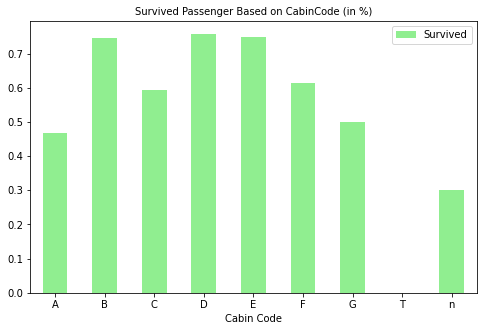

In [232]:
cabcode = (train['Survived'].groupby(train['Cabin Code']).mean()).to_frame()
ax = cabcode.plot.bar(figsize=(8,5),rot=0,color='lightgreen')
ax.set_title("Survived Passenger Based on CabinCode (in %)", fontsize =10);

In [233]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Group,old,child,Cabin Information,Cabin Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low fare,0,0,Not Available,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High fare,1,0,Available,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Low fare,0,0,Not Available,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High fare,1,0,Available,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Low fare,1,0,Not Available,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Low fare,0,0,Not Available,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High fare,0,0,Available,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High fare,0,0,Not Available,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,High fare,0,0,Available,C


In [234]:
# #Number of travel companion
train['Travel Member']=train.SibSp + train.Parch +1

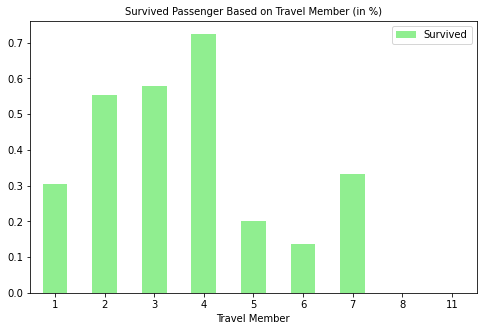

In [235]:
travmem = (train['Survived'].groupby(train['Travel Member']).mean()).to_frame()
ax = travmem.plot.bar(figsize=(8,5),rot=0,color='lightgreen')
ax.set_title("Survived Passenger Based on Travel Member (in %)", fontsize =10);

In [236]:
train['Ideal Group']= 'no'
#Considered as high if fare higher than median
train.loc[train['Travel Member'] == 2 , 'Ideal Group'] = 'yes'
train.loc[train['Travel Member'] == 3 , 'Ideal Group'] = 'yes'
train.loc[train['Travel Member'] == 4 , 'Ideal Group'] = 'yes'

In [237]:
idealtravmem

,Survived
Ideal Group,
no,0.288815
yes,0.578767


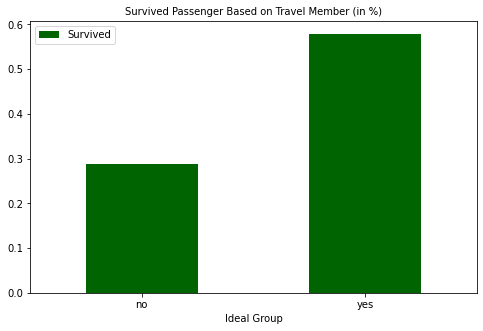

In [238]:
idealtravmem = (train['Survived'].groupby(train['Ideal Group']).mean()).to_frame()
ax = idealtravmem.plot.bar(figsize=(8,5),rot=0,color='darkgreen')
ax.set_title("Survived Passenger Based on Travel Member (in %)", fontsize =10);

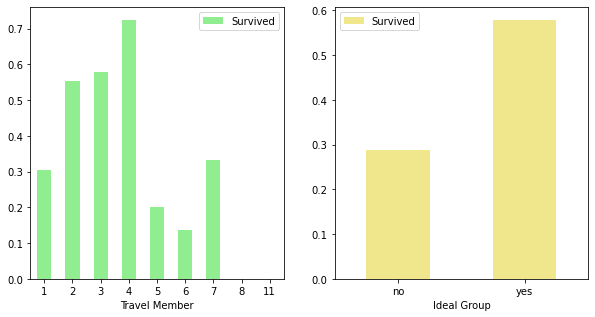

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize =(10,5))
travmem.plot.bar(ax=axes[0],rot=0,color='lightgreen')
idealtravmem.plot.bar(ax=axes[1],rot=0,color='khaki');

In [180]:
###Missing VALUES

In [240]:
#Extract titles from each name
train['titles'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#input missing values age
title_med = train.groupby('titles')['Age'].transform('median')
train['Age']=train['Age'].fillna(title_med)

In [241]:
#missing values
#Embarked
#train['Embarked'] = train['Embarked'].fillna('S')
#Cabin
#train['Cabin']=train['Cabin'].fillna('NA')

In [242]:
###Create Features

In [243]:
#Create Variable

In [244]:
#Create dummy and change value

In [245]:
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])

In [246]:
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
train['Cabin Information'] = LabelEncoder().fit_transform(train['Cabin Information'])
train['Fare Group'] = LabelEncoder().fit_transform(train['Fare Group'])
train['Ideal Group'] = LabelEncoder().fit_transform(train['Ideal Group'])

In [247]:
# titles_df = pd.get_dummies(train, columns=['titles'])
# train = titles_df

In [248]:
pclass_df = pd.get_dummies(train, columns=['Pclass'])
train = pclass_df
embark_df = pd.get_dummies(train, columns=['Embarked'])
train = embark_df

In [249]:
target_name = 'Survived'

train_sr_targets = train.loc[:,target_name]

In [250]:
train.dtypes

PassengerId            int64
Survived               int64
Name                  object
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Fare Group             int64
old                    int64
child                  int64
Cabin Information      int64
Cabin Code            object
Travel Member          int64
Ideal Group            int64
titles                object
Pclass_1               uint8
Pclass_2               uint8
Pclass_3               uint8
Embarked_C             uint8
Embarked_Q             uint8
Embarked_S             uint8
dtype: object

In [73]:
#try all possible features

In [362]:
selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','child','old','Ideal Group','Cabin Information','Fare Group']

In [363]:
selected

['Sex',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'child',
 'old',
 'Ideal Group',
 'Cabin Information',
 'Fare Group']

In [313]:
selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','child','Ideal Group','Cabin Information','old','Fare Group']

In [343]:
selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','child','Ideal Group','old']

In [364]:
train_df_features = train.loc[:,selected]

In [345]:
train_df_features

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,child,Ideal Group,old
0,1,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,1
2,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,1
4,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,1,0,0,0
887,0,1,0,0,0,0,1,0,0,0
888,0,0,0,1,0,0,1,0,1,0
889,1,1,0,0,1,0,0,0,0,0


In [319]:
train_df_features = train_df_features / train_df_features.std()

In [47]:
#train_x, test_x, train_y, test_y = train_test_split(df_features, sr_targets, random_state = 2)

In [48]:
tree.DecisionTreeClassifier()

DecisionTreeClassifier()

In [49]:
#Prepare the data for testing set

In [254]:
#Extract titles from each name
test['titles'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#input missing values age
title_med = test.groupby('titles')['Age'].transform('median')
test['Age']=test['Age'].fillna(title_med)

In [255]:
#Filling the remaining missing values after previous step
test['Age'] = test['Age'].fillna(test.Age.median())

In [256]:
#Filling median fare
test['Fare'] = test['Fare'].fillna(test.Fare.median())

In [257]:
#Give old if higher than mean
test['old']= 0
test.loc[test.Age >= test.Age.median(), 'old'] = 1
#Create child features
test['child']= 0
test.loc[test.Age <= 10, 'child'] = 1

In [258]:
#Create highfare variable
test['Fare Group']= 'low fare'
#Considered as high if fare higher than median
test.loc[test.Fare >= test.Fare.median(), 'Fare Group'] = 'high fare'

In [259]:
#Number of travel companion
test['Travel Member']=train.SibSp + train.Parch +1

In [260]:
test['Ideal Group']= 'no'
#Considered as high if fare higher than median
test.loc[train['Travel Member'] == 2 , 'Ideal Group'] = 'yes'
test.loc[train['Travel Member'] == 3 , 'Ideal Group'] = 'yes'
test.loc[train['Travel Member'] == 4 , 'Ideal Group'] = 'yes'

In [261]:
#Cabin
test['Cabin Information']= 'Not Available'
test.loc[train.Cabin.notnull(), 'Cabin Information'] = 'Available'

In [262]:
#Convert Variable
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
test['Fare Group'] = LabelEncoder().fit_transform(test['Fare Group'])
test['Ideal Group'] = LabelEncoder().fit_transform(test['Ideal Group'])
test['Cabin Information'] = LabelEncoder().fit_transform(test['Cabin Information'])

In [263]:
pclass_df = pd.get_dummies(test, columns=['Pclass'])
test = pclass_df
embark_df = pd.get_dummies(test, columns=['Embarked'])
test = embark_df

In [365]:
test_df_features = test.loc[:,selected]
test_df_features

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,child,old,Ideal Group,Cabin Information,Fare Group
0,1,0,0,1,0,1,0,0,1,1,1,1
1,0,0,0,1,0,0,1,0,1,1,0,1
2,1,0,1,0,0,1,0,0,1,0,1,1
3,1,0,0,1,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,1,0,0,1,0,1,0,1,1
414,0,1,0,0,1,0,0,0,1,0,1,0
415,1,0,0,1,0,0,1,0,1,0,1,1
416,1,0,0,1,0,0,1,0,1,1,1,1


In [322]:
test_df_features = test_df_features / test_df_features.std()
test_df_features

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,child,Ideal Group,old
0,2.076317,0.000000,0.000000,1.999461,0.00000,3.19158,0.000000,0.000000,2.108907,2.004247
1,0.000000,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,2.108907,2.004247
2,2.076317,0.000000,2.401447,0.000000,0.00000,3.19158,0.000000,0.000000,0.000000,2.004247
3,2.076317,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,2.108907,0.000000
4,0.000000,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
413,2.076317,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,0.000000,2.004247
414,0.000000,2.288675,0.000000,0.000000,2.32548,0.00000,0.000000,0.000000,0.000000,2.004247
415,2.076317,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,0.000000,2.004247
416,2.076317,0.000000,0.000000,1.999461,0.00000,0.00000,2.088543,0.000000,2.108907,2.004247


In [ ]:
test_df_

In [55]:
#Logistic Regression

In [122]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(train_df_features, train_sr_targets)
Y_pred = logreg.predict(test_df_features)
#acc_log = round(logreg.score(train_x, train_y) * 100,3)
score = cross_val_score(logreg, train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

79.46644906157805

In [ ]:
#SVC

In [347]:
svc = SVC()
#svc = SVC()
svc.fit(train_df_features, train_sr_targets)
Y_pred = svc.predict(test_df_features)
#acc_svc = round(svc.score(train_x, train_y) * 100,3)
score = cross_val_score(svc,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

83.0525390747599

In [348]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(train_df_features, train_sr_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    5.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [349]:
print(grid.best_estimator_)
bestsvc = grid.best_estimator_

SVC(C=10, gamma=0.1)


In [351]:
#bestgrid = grid.best_estimator_.fit(train_df_features, train_sr_targets)
score = cross_val_score(bestsvc,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

82.93829640323898

In [366]:
treeclass =tree.DecisionTreeClassifier(max_depth=4)
treeclass.fit(train_df_features, train_sr_targets)
Y_pred = treeclass.predict(test_df_features)
score = cross_val_score(treeclass,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
score
np.mean(score)*100

83.0525390747599

In [357]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20]}
grid = GridSearchCV(treeclass,tree_param,refit=True,verbose=2)
grid.fit(train_df_features, train_sr_targets)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ...................... criterion=gini, max_depth=1, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ...................... criterion=gini, max_depth=2, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=8, total=   0.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ...................... criterion=gini, max_depth=8, total=   0.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ...................... criterion=gini, max_depth=8, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV] ...................... criterion=gini, max_depth=9, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV] ...................... criterion=gini, max_depth=9, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV] ...................... criterion=gini, max_depth=9, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV] ...................... criterion=gini, max_depth=9, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV] .

[CV] .................. criterion=entropy, max_depth=10, total=   0.0s
[CV] criterion=entropy, max_depth=11 .................................
[CV] .................. criterion=entropy, max_depth=11, total=   0.0s
[CV] criterion=entropy, max_depth=11 .................................
[CV] .................. criterion=entropy, max_depth=11, total=   0.0s
[CV] criterion=entropy, max_depth=11 .................................
[CV] .................. criterion=entropy, max_depth=11, total=   0.0s
[CV] criterion=entropy, max_depth=11 .................................
[CV] .................. criterion=entropy, max_depth=11, total=   0.0s
[CV] criterion=entropy, max_depth=11 .................................
[CV] .................. criterion=entropy, max_depth=11, total=   0.0s
[CV] criterion=entropy, max_depth=12 .................................
[CV] .................. criterion=entropy, max_depth=12, total=   0.0s
[CV] criterion=entropy, max_depth=12 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       15, 20]},
             verbose=2)

In [358]:
print(grid.best_estimator_)
besttree = grid.best_estimator_

DecisionTreeClassifier(max_depth=7)


In [360]:
besttree = grid.best_estimator_.fit(train_df_features, train_sr_targets)
score = cross_val_score(besttree,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

82.38089259933463

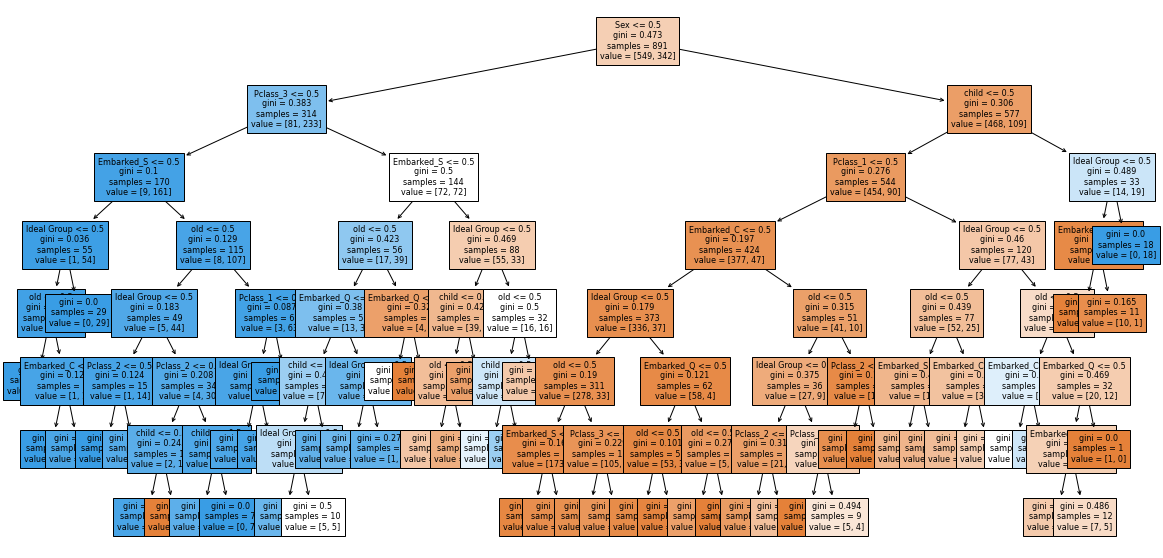

In [361]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(besttree, feature_names=selected,filled=True, fontsize=8)

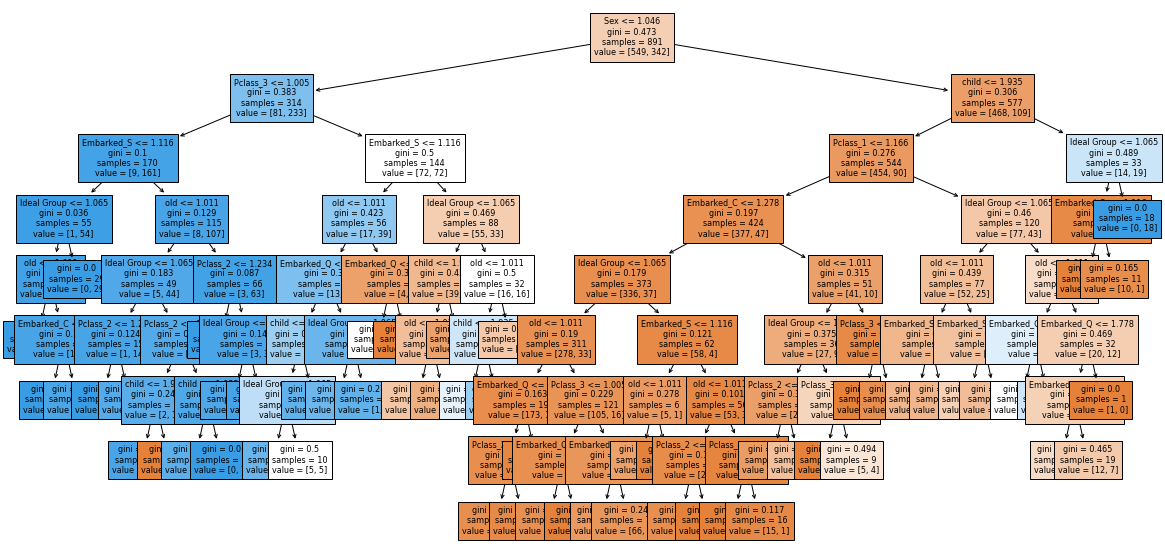

In [355]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(treeclass, feature_names=selected,filled=True, fontsize=8)

In [302]:
for feat, importance in zip(train_df_features, besttree.feature_importances_):
     print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: Sex, importance: 0.5806476122631186
feature: Pclass_1, importance: 0.053465517627733966
feature: Pclass_2, importance: 0.0032259513039737914
feature: Pclass_3, importance: 0.14674243446351826
feature: Embarked_C, importance: 0.009544942553462691
feature: Embarked_Q, importance: 0.002001762484044937
feature: Embarked_S, importance: 0.034659281737480514
feature: child, importance: 0.06138560931030174
feature: Ideal Group, importance: 0.08327941255209032
feature: old, importance: 0.025047475704275325


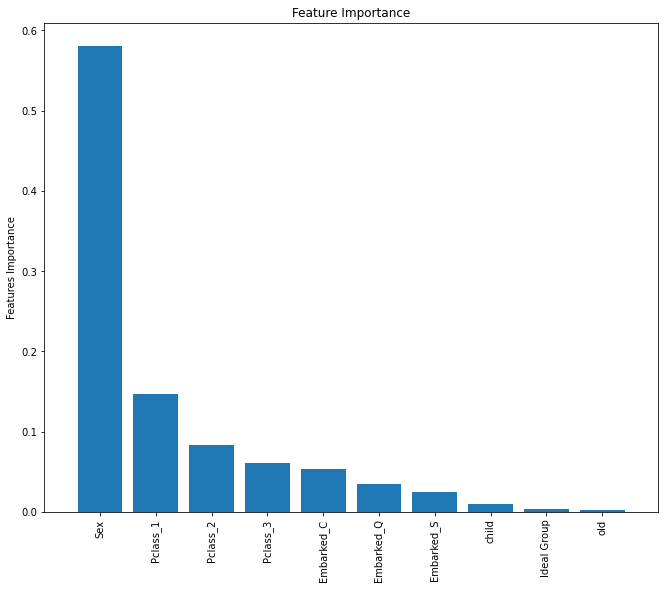

In [305]:
importances = besttree.feature_importances_
indices = np.argsort(importances)[::-1]
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature Importance")
plt.bar(range(train_df_features.shape[1]), importances[indices])
plt.xticks(range(train_df_features.shape[1]), indices)
plt.xlim([-1, train_df_features.shape[1]])
plt.ylabel("Features Importance")
feature_names = train_df_features
plt.xticks(range(train_df_features.shape[1]), feature_names,rotation=90);

In [353]:
result = bestsvc.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [273]:
result = svc.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [287]:
result = besttree.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [354]:
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv


In [274]:
test_df_features

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,child,Ideal Group
0,1,0,0,1,0,1,0,0,1
1,0,0,0,1,0,0,1,0,1
2,1,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
413,1,0,0,1,0,0,1,0,0
414,0,1,0,0,1,0,0,0,0
415,1,0,0,1,0,0,1,0,0
416,1,0,0,1,0,0,1,0,1


In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

In [82]:
svc = SVC()
svc.fit(train_df_features, train_sr_targets)
Y_pred = svc.predict(test_df_features)
#acc_svc = round(svc.score(train_x, train_y) * 100,3)
score = cross_val_score(svc,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

83.0525390747599

Text(0.5, 1.0, 'Accuracy scores for different C-score')

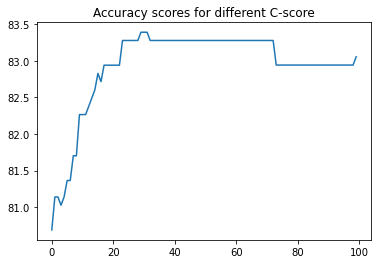

In [89]:
# Set the folds 
nb_folds = 5
cv = KFold(n_splits=nb_folds)

# Set empty list to store the performance scores 
performance_cval = []
for i in np.linspace(0.1,1,100):
    svcs = SVC(C=i)
    svcs.fit(train_df_features, train_sr_targets)
    performance_cval.append(cross_val_score(svcs,train_df_features, train_sr_targets, cv=cv).mean()*100)

plt.plot(performance_cval)
#plt.axis([0.1,0.5,0,100])
#plt.xticks(np.linspace(0.1,1,10))
#plt.xlabel('C score')
#plt.ylabel('Accuracy Scores')
plt.title('Accuracy scores for different C-score')

In [90]:
maximum = max(performance_cval)
max_index = performance_cval.index(maximum)+1
best_c =np.linspace(0.1,1,100)
best_c[max_index]

0.3727272727272727

In [106]:
treeclass =tree.DecisionTreeClassifier(max_depth = 7)
treeclass.fit(train_df_features, train_sr_targets)
Y_pred = treeclass.predict(test_df_features)
score = cross_val_score(treeclass,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

82.38089259933463

Text(0.5, 1.0, 'Accuracy scores for different tree sizes')

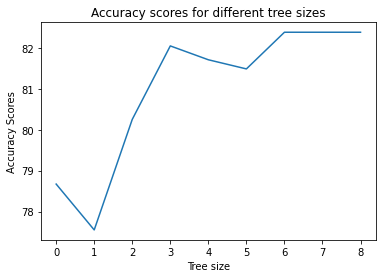

In [98]:
# Set the folds 
nb_folds = 5
cv = KFold(n_splits=nb_folds)

# Set empty list to store the performance scores 
performance_cval = []
for i in range(1,10):
    trees = tree.DecisionTreeClassifier(max_depth = i)
    trees.fit(train_df_features, train_sr_targets)
    performance_cval.append(cross_val_score(trees,train_df_features, train_sr_targets, cv=cv).mean()*100)

plt.plot(performance_cval)
plt.xlabel('Tree size')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy scores for different tree sizes')

In [118]:
maximum = max(performance_cval)
max_index = performance_cval.index(maximum)
max_depth =range(1,10)
max_depth[max_index]

7

In [147]:
rf = RandomForestClassifier()
rf.fit(train_df_features, train_sr_targets)
Y_pred = rf.predict(test_df_features)
score = cross_val_score(rf,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

80.81288054736049

In [146]:
rf = RandomForestClassifier(max_depth = 7)
rf.fit(train_df_features, train_sr_targets)
Y_pred = rf.predict(test_df_features)
score = cross_val_score(rf,train_df_features, train_sr_targets, cv=k_fold, scoring='accuracy')
np.mean(score)*100

81.93333751804659

Text(0.5, 1.0, 'Accuracy scores for different tree sizes')

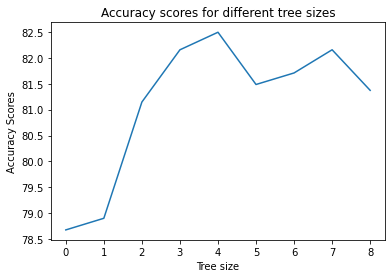

In [78]:
# Set the folds 
nb_folds = 5
cv = KFold(n_splits=nb_folds)

# Set empty list to store the performance scores 
performance_cval = []
for i in range(1,10):
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(train_df_features, train_sr_targets)
    performance_cval.append(cross_val_score(rf,train_df_features, train_sr_targets, cv=cv).mean()*100)

plt.plot(performance_cval)
plt.xlabel('Tree size')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy scores for different tree sizes')

In [135]:
maximum = max(performance_cval)
max_index = performance_cval.index(maximum)
max_depth =range(1,10)
max_depth[max_index]

7

In [ ]:
# result = tree.predict(df_features)
# submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [121]:
result = logreg.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [123]:
svc

SVC()

In [124]:
result = svc.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [107]:
treeclass

DecisionTreeClassifier(max_depth=7)

In [148]:
result = rf.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [108]:
result = treeclass.predict(test_df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [149]:
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv


78.468 using selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','old']


Next: check cross validation

using this get 0.78947

In [ ]:
selected

In [ ]:
#Fare and parch and sibsp higher as its total

In [ ]:
#try to group if woman and age

In [ ]:
#Using Lasso and Ridge

In [ ]:
# def run_kfold(clf):
#     kf = KFold(891, n_folds=5)
#     outcomes = []
#     fold = 0
#     for train_index, test_index in kf:
#         fold += 1
#         Xtrain, Xtest = train_X.values[train_index], train_X.values[test_index]
#         ytrain, ytest = train_y.values[train_index], train_y.values[test_index]
#         clf.fit(Xtrain, ytrain)
#         predictions = clf.predict(Xtest)
#         accuracy = accuracy_score(ytest, predictions)
#         outcomes.append(accuracy)
#     mean_outcome = np.mean(outcomes)
#     print("Mean Accuracy: {0}".format(mean_outcome)) 

In [ ]:
features= train[selected]

In [ ]:
# Split the data into a training and testing set 
features_train, features_test, sr_targets_train, sr_targets_test = train_test_split(features, sr_targets, random_state = 0)



In [ ]:
# Set up the logit regression model
logisticRegr = LogisticRegression(max_iter=1000000)

# Fit the logit regression model
reg = logisticRegr.fit(features, sr_targets)

In [ ]:


# Store coefficients of logistic regression in a list 
coefficients = reg.coef_

# Standardize coeffcients for fair comparison
standardized_coefficients = (coefficients - coefficients.mean()) / coefficients.std()

# Create dataframe for convience
df_standardized_coefficients = pd.DataFrame(standardized_coefficients, columns=relevant_features)
df_standardized_coefficients

In [ ]:
# Make predictions and store them
predictions = reg.predict(features)
scores = cross_val_score()

In [ ]:
print(accuracy_score(predictions, sr_targets_test))

In [ ]:
test['fare group'] = LabelEncoder().fit_transform(train['fare group'])

In [ ]:
train['idealnumber'] = LabelEncoder().fit_transform(train['idealnumber'])

In [ ]:
pclass_df = pd.get_dummies(train, columns=['Pclass'])
train = pclass_df

In [ ]:
embark_df = pd.get_dummies(train, columns=['Embarked'])
train = embark_df

In [ ]:
train['fare group'] = LabelEncoder().fit_transform(train['fare group'])

In [ ]:
train['idealnumber'] = LabelEncoder().fit_transform(train['idealnumber'])

In [ ]:
pclass_df = pd.get_dummies(train, columns=['Pclass'])
train = pclass_df

In [ ]:
embark_df = pd.get_dummies(train, columns=['Embarked'])
train = embark_df

In [ ]:
sns.barplot(data=train, x = "Sex", y = "Survived")
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize =10)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()

In [ ]:
sns.displot(train.Fare);

In [ ]:
sns.displot(train.Age)

In [ ]:
dtypes

In [ ]:
sns.heatmap(train.isnull(), cbar=False, cmap="Oranges")
sns.color_palette("tab10");
plt.savefig('missing-value.png',figsize=(9, 11))

In [ ]:
train.corr()

In [ ]:
#Check the number of missing values
train.isnull().sum()

In [ ]:
#I need to input the missing values
#For embark, assign higher

In [ ]:
#Majority of embarkation
train['Embarked'].value_counts(normalize=True) * 100

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
train.isnull().sum()

In [ ]:
train['Cabin']=train['Cabin'].fillna('NA')

In [ ]:
train.isnull().sum()

In [ ]:
train

In [ ]:
#Extract titles from each name
train['titles'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train

In [ ]:
mean_age = (train.groupby(train['titles']).median()['Age']).to_frame()
mean_age

In [ ]:
# train[train['Age'].isna()]

In [ ]:
title_med = train.groupby('titles')['Age'].transform('median')
train['Age']=train['Age'].fillna(title_med)

In [ ]:
# train.isnull().sum()

In [ ]:
#train[train.Name=='Johnston, Miss. Catherine Helen "Carrie"']

In [ ]:
train

In [ ]:
train.Age.median()

In [ ]:
#Check unique value first

In [ ]:
print(train.Sex.unique())
# There are 2 categories of gender

In [ ]:
train.Ticket.nunique()

In [ ]:
train.Fare.nunique()

In [ ]:
train.Parch.unique()

In [ ]:
train.Cabin.nunique()
print(train.Cabin.unique())

In [ ]:
#Group based on A,B,C for the cabin

In [ ]:
print(train.Sex.unique())
# There are 2 categories of gender

In [ ]:
#See based on sex
#Idea is they save the woman first
sex = (train['Survived'].groupby(train['Sex']).mean()).to_frame()#
sex['Not Survived']= 1 -sex.Survived

ax = sex.plot.bar(figsize=(8,5),rot=0)

In [ ]:
sex

In [ ]:
#See based on embarkation
embarkation = (train['Survived'].groupby(train['Embarked']).mean()).to_frame()
embarkation['Not Survived']= 1 -embarkation.Survived


ax = embarkation.plot.bar(figsize=(8,5),rot=0)

In [ ]:
#See based on socio economic status
#Idea is they save the higher status first
status = (train['Survived'].groupby(train['Pclass']).mean()).to_frame()
status['Not Survived']= 1 -status.Survived
ax = status.plot.bar(figsize=(8,5),rot=0)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize =(12,6))
status.plot(ax=axes[0], kind='bar',rot=0)
sex.plot(ax=axes[1], kind='bar',rot=0);
embarkation.plot(ax=axes[2], kind='bar',rot=0);
plt.savefig('statussexemb.png',figsize=(9, 11))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])

In [ ]:
train

In [ ]:
pclass_df = pd.get_dummies(train, columns=['Pclass'])
train = pclass_df

In [ ]:
embark_df = pd.get_dummies(train, columns=['Embarked'])
train = embark_df

In [ ]:
train.Fare.mean()

In [ ]:
#Create highfare variable
train['highfare']= 0
#Considered as high if fare higher than median
train.loc[train.Fare >= train.Fare.median(), 'highfare'] = 1

In [ ]:
highfare = (train['Survived'].groupby(train['highfare']).mean()).to_frame()
highfare['Not Survived']= 1 -highfare.Survived
ax = highfare.plot.bar(figsize=(8,5),rot=0)

In [ ]:
lgroups = (train['Survived'].groupby(train['group']).mean()).to_frame()
lgroups['Not Survived']= 1 -lgroups.Survived
ax = lgroups.plot.bar()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize =(12,6))
highfare.plot(ax=axes[0], kind='bar',rot=0)
lgroups.plot(ax=axes[1], kind='bar',rot=0)
wcabin.plot(ax=axes[2], kind='bar',rot=0);
plt.savefig('faregroup.png',figsize=(9, 11))

In [ ]:
#Give old if higher than mean
train['old']= 0
train.loc[train.Age >= train.Age.mean(), 'old'] = 1

In [ ]:
oldy = (train['Survived'].groupby(train['old']).mean()).to_frame()

ax = oldy.plot.bar()

In [ ]:
#Number of travel companion
train['travcomp']=train.SibSp + train.Parch +1

In [ ]:
train['group']= 0
train.loc[train.travcomp > 1, 'group'] = 1
train

In [ ]:
companion = (train['Survived'].groupby(train['travcomp']).mean()).to_frame()

ax = companion.plot.bar()

In [ ]:
train

In [ ]:
lgroups = (train['Survived'].groupby(train['group']).mean()).to_frame()
lgroups['Not Survived']= 1 -lgroups.Survived
ax = lgroups.plot.bar()

In [ ]:
#Cabin
train['withcabin']= 0
train.loc[train.Cabin.notnull(), 'withcabin'] = 1

In [ ]:
wcabin = (train['Survived'].groupby(train['withcabin']).mean()).to_frame()
wcabin['Not Survived']= 1 -wcabin.Survived
ax = wcabin.plot.bar()

In [ ]:
train.isnull().sum()

In [ ]:
target_name = 'Survived'

sr_targets = train.loc[:,target_name]

In [ ]:
selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','highfare','group','withcabin']

In [ ]:
selected =['withcabin']

In [ ]:
df_features = train.loc[:,selected]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_features, sr_targets, random_state = 2)

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

In [ ]:
test.head()

In [ ]:
#Check the datatypes
test.dtypes

In [ ]:
#Check the number of missing values
test.isnull().sum()

In [ ]:
#Fill fare using mean
test['Fare'] = test['Fare'].fillna(test.Fare.mean())

In [ ]:
test['Cabin']=test['Cabin'].fillna('NA')

In [ ]:
#Extract titles from each name
test['titles'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
test

In [ ]:
# mean_age = (train.groupby(train['titles']).median()['Age']).to_frame()
# mean_age

In [ ]:
title_med = test.groupby('titles')['Age'].transform('median')
test['Age']=test['Age'].fillna(title_med)

In [ ]:
#Filling the missing values
test['Age'] = test['Age'].fillna(test.Age.median())

In [ ]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [ ]:
test

In [ ]:
pclass_df = pd.get_dummies(test, columns=['Pclass'])
test = pclass_df

In [ ]:
embark_df = pd.get_dummies(test, columns=['Embarked'])
test = embark_df

In [ ]:
#Create highfare variable
test['highfare']= 0
#Considered as high if fare higher than median
test.loc[test.Fare >= test.Fare.median(), 'highfare'] = 1

In [ ]:
#Give old if higher than mean
test['old']= 0
test.loc[test.Age >= test.Age.median(), 'old'] = 1
test

In [ ]:
test['group']= 0
test.loc[train.travcomp > 1, 'group'] = 1
test

In [ ]:
selected =['Sex','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','highfare','old','group']

In [ ]:
df_features = test.loc[:,selected]

In [ ]:
result = svc.predict(df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [ ]:
result = logreg.predict(df_features)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})

In [ ]:
submission

In [ ]:
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
svc = SVC()
svc.fit(train_x, train_y)
Y_pred = svc.predict(test_x)
acc_svc = round(svc.score(train_x, train_y) * 100, 1)
acc_svc

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

In [ ]:
# import string

In [ ]:
# train['cabcode'] = train['Cabin'].str.rstrip(string.digits)

In [ ]:
# train

In [ ]:
cab = (train['Survived'].groupby(train['cabcodez']).mean()).to_frame()

ax = cab.plot.bar()

In [ ]:
train['cabcodes'] = train['Cabin'][0:0]

In [ ]:
train

In [ ]:
train['cabcodez'] = train['Cabin'].astype(str).str[0]
train

In [ ]:
df['new_col'] = df['First'].astype(str).str[0]

In [ ]:
first_chars = sample_str[0:3]

In [ ]:
train

In [ ]:
oldy = (train['Survived'].groupby(train['old']).mean()).to_frame()

ax = oldy.plot.bar()

In [ ]:
# import relevant libraries
import sklearn
from sklearn import svm
#from lib.plots import plot_classification_contours

# Store feature values in a numpy array
X = df_features.values

# Store the true credit ratings in numpy array
y_true = sr_targets.values

# Define SVC model, with linear kernel as asked
clf = svm.SVC(kernel='linear')

# Fit the model
clf_fit = clf.fit(X,y_true)

# Plot model with linear SVC line with print statement to avoid getting the graph twice
#print(plot_classification_contours(X, y_true, clf_fit, [feature1,feature2]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.model_selection import train_test_split   # split train and test dataset
from sklearn.metrics import mean_absolute_error 

In [ ]:
test

In [ ]:
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [ ]:
test['old']= 0
test.loc[test.Age >= test.Age.median(), 'old'] = 1

In [ ]:
pclass_df = pd.get_dummies(test, columns=['Pclass'])

In [ ]:
test = pclass_df

In [ ]:
test

In [ ]:
test['Cabin']=test['Cabin'].fillna('NA')
test.isnull().sum()

In [ ]:
#Extract titles from each name
test['titles'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
title_med = test.groupby('titles')['Age'].transform('median')
test['Age']=test['Age'].fillna(title_med)

In [ ]:
test.isnull().sum()

In [ ]:
test.groupby('titles').median()['Age']

In [ ]:
test[test.titles=='Ms']